Model Development¶

In [89]:
import sys
!{sys.executable} -m pip install scikit-learn

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd     
import numpy as np 




In [91]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(file_path)

In [92]:
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1



1. Linear Regression and Multiple Linear Regression
Linear Regression
One example of a Data Model that we will be using is:

Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.



Yhat = a + b  X







In [93]:
from sklearn.linear_model import LinearRegression

Create the linear regression object:

In [94]:
lm = LinearRegression()
lm 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.
- Fit the linear model using highway-mpg:

In [95]:
x =df[['highway-mpg']]
y = df[['price']]
lm.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We can output a prediction:

In [96]:
Yhat = lm.predict(x)
Yhat[0:20]


array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011],
       [17879.97140011],
       [21988.63829172],
       [14593.03788682],
       [14593.03788682],
       [15414.77126514],
       [15414.77126514],
       [17879.97140011],
       [20345.17153508],
       [20345.17153508],
       [21988.63829172],
       [-5128.5631929 ],
       [ 3088.77059031],
       [ 3088.77059031]])

In [97]:
x_new = np.array([[30]])
yhat = lm.predict(x_new)
yhat

c:\Users\Tengkai\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13771.3045085]])

What is the value of the intercept (a)?

In [98]:
lm.intercept_

array([38423.30585816])

What is the value of the slope (b)?

In [99]:
lm.coef_


array([[-821.73337832]])






Price = 38423.31 - 821.73 x highway-mpg

Question #1 a): 
Create a linear regression object called "lm1".

In [100]:
lm1 = LinearRegression()
x=df[['engine-size']]
y=df[['price']]

lm1.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Question #1 c):
Find the slope and intercept of the model.

In [101]:
print('Intercept:', lm1.intercept_)
print('slope:', lm1.coef_)

Intercept: [-7963.33890628]
slope: [[166.86001569]]


Question #1 d): ¶
What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".


Price=-7963.34 + 166.86*df['engine-size']

In [102]:
predicted_prices = lm1.predict(x)

predicted_prices[0:20]


array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775],
       [14729.62322775],
       [14729.62322775],
       [14729.62322775],
       [13895.32314929],
       [10057.54278839],
       [10057.54278839],
       [19401.70366711],
       [19401.70366711],
       [19401.70366711],
       [26910.40437322],
       [26910.40437322],
       [26910.40437322],
       [ 2215.1220509 ],
       [ 7054.06250595],
       [ 7054.06250595]])

Multiple Linear Regression

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

In [103]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [104]:
lm2 = LinearRegression()
lm2.fit(Z,df['price'])



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
lm2.intercept_

np.float64(-15806.62462632923)

In [106]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

Question #2 a): 
Create and train a Multiple Linear Regression model "lm3" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [107]:
V= df[['normalized-losses','highway-mpg']]
lm3 = LinearRegression()
lm3.fit(V, df['price'])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Question #2 b): 
Find the coefficient of the model.


In [108]:
lm3.coef_

array([   1.49789586, -820.45434016])








<h2>2. Model Evaluation Using Visualization</h2>

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:



(0.0, 48172.968543448624)

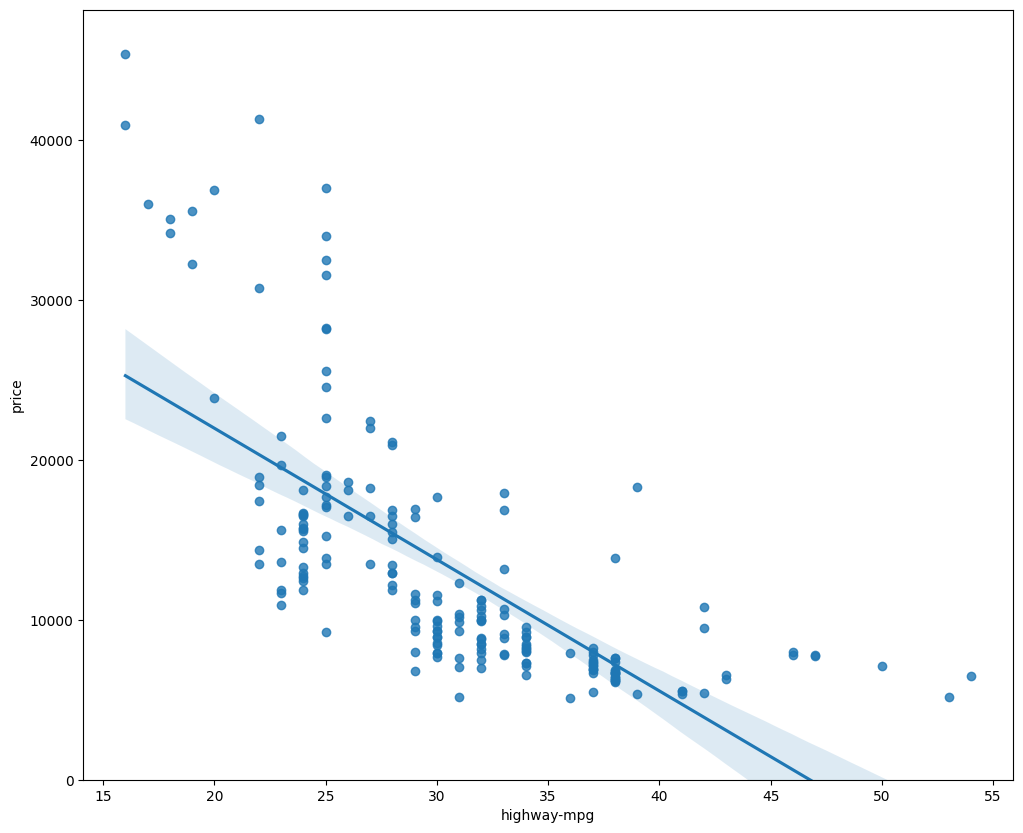

In [109]:
plt.figure(figsize = (12,10))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)


We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

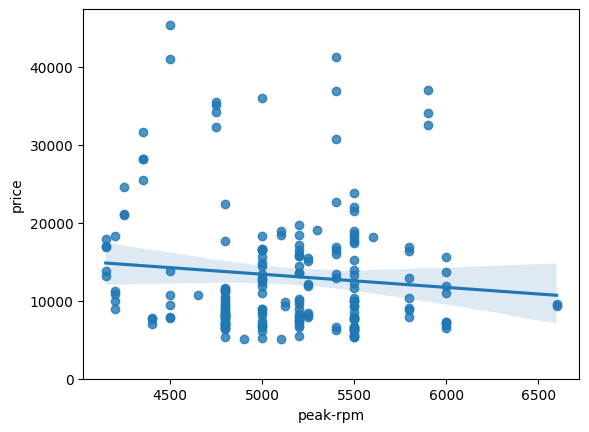

In [110]:

sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [111]:
df[["peak-rpm","highway-mpg","price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [112]:
muti_predict = lm3.predict(V)

muti_predict[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

<Axes: xlabel='highway-mpg', ylabel='price'>

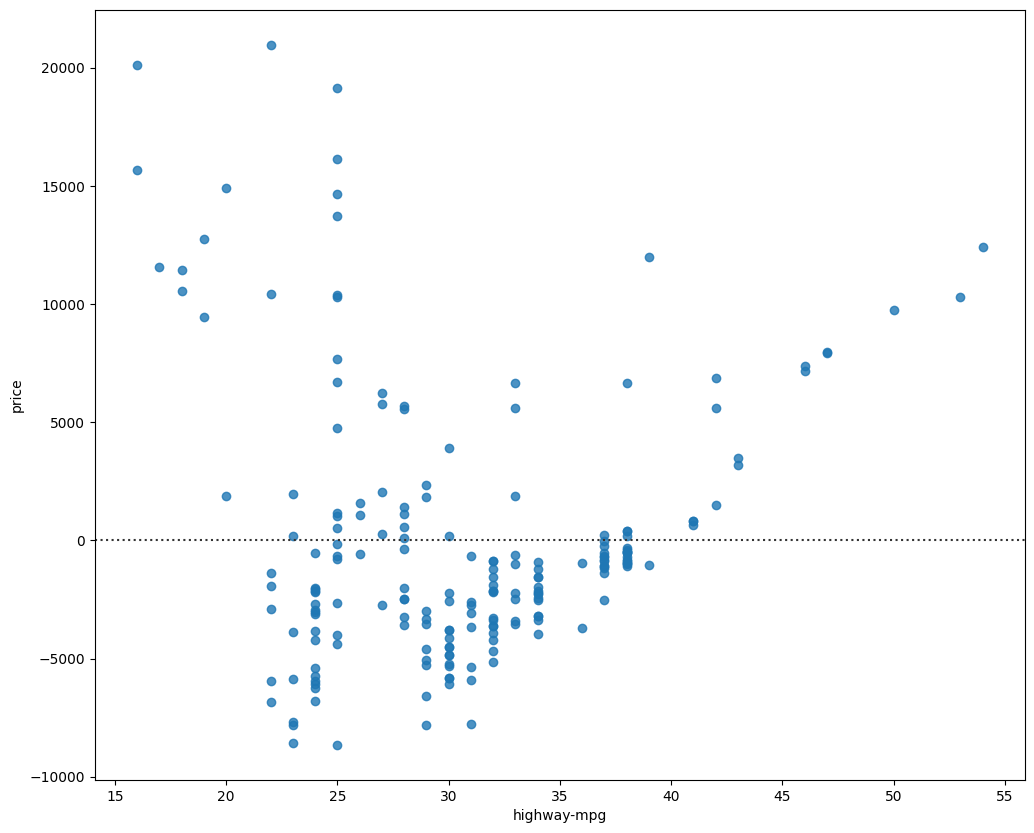

In [113]:
plt.figure(figsize = (12,10))
sns.residplot(x=df['highway-mpg'],y=df['price'])

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data. v

Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [114]:
Y_hat = lm2.predict(Z)

C:\Users\Tengkai\AppData\Local\Temp\ipykernel_11176\54101606.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'],hist=False, color='r', label = 'Actual Value')
C:\Users\Tengkai\AppData\Local\Temp\ipykernel_11176\54101606.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

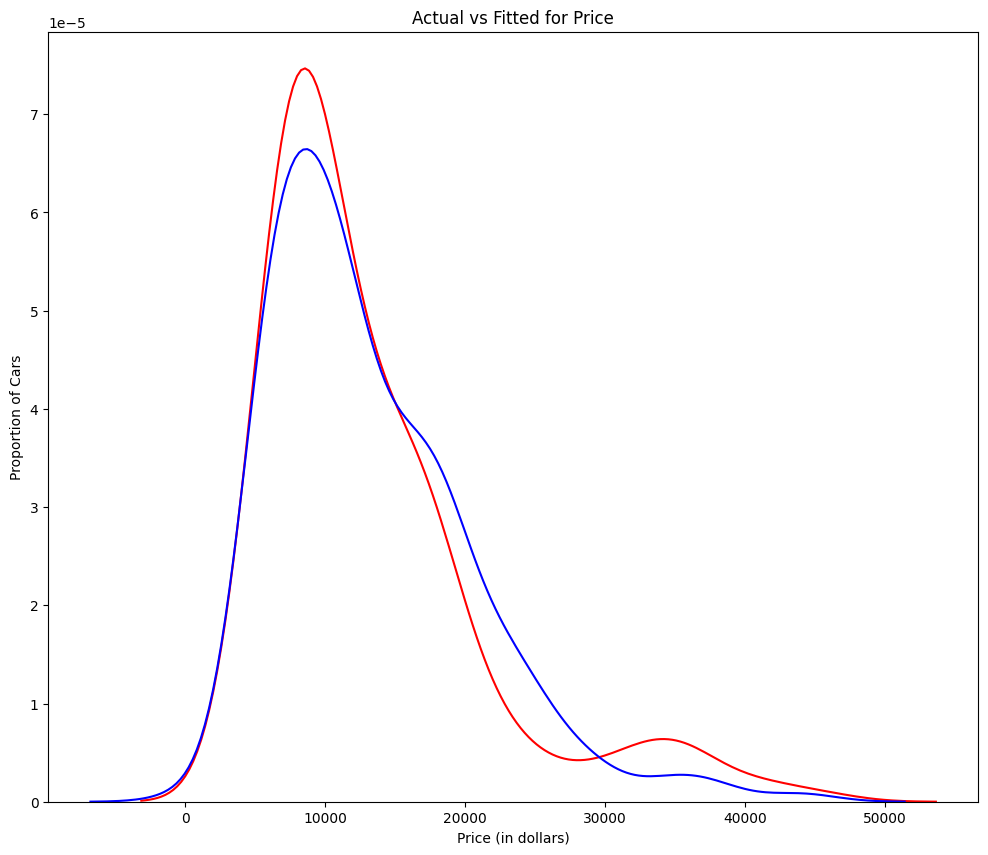

In [115]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(df['price'],hist=False, color='r', label = 'Actual Value')
sns.distplot(Y_hat,hist=False, color='b',label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [116]:
np.linspace(15,55,100)

array([15.        , 15.4040404 , 15.80808081, 16.21212121, 16.61616162,
       17.02020202, 17.42424242, 17.82828283, 18.23232323, 18.63636364,
       19.04040404, 19.44444444, 19.84848485, 20.25252525, 20.65656566,
       21.06060606, 21.46464646, 21.86868687, 22.27272727, 22.67676768,
       23.08080808, 23.48484848, 23.88888889, 24.29292929, 24.6969697 ,
       25.1010101 , 25.50505051, 25.90909091, 26.31313131, 26.71717172,
       27.12121212, 27.52525253, 27.92929293, 28.33333333, 28.73737374,
       29.14141414, 29.54545455, 29.94949495, 30.35353535, 30.75757576,
       31.16161616, 31.56565657, 31.96969697, 32.37373737, 32.77777778,
       33.18181818, 33.58585859, 33.98989899, 34.39393939, 34.7979798 ,
       35.2020202 , 35.60606061, 36.01010101, 36.41414141, 36.81818182,
       37.22222222, 37.62626263, 38.03030303, 38.43434343, 38.83838384,
       39.24242424, 39.64646465, 40.05050505, 40.45454545, 40.85858586,
       41.26262626, 41.66666667, 42.07070707, 42.47474747, 42.87

3. Polynomial Regression and Pipelines



Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

In [117]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'_')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    x = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [118]:
x = df['highway-mpg']
y = df['price']

In [119]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


NameError: name 'ax' is not defined

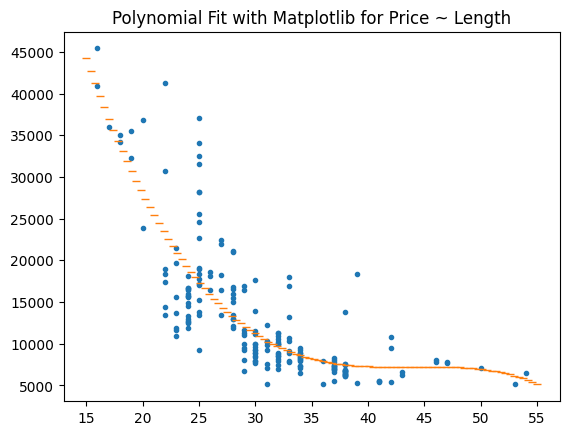

In [120]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Question #4:¶
Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


NameError: name 'ax' is not defined

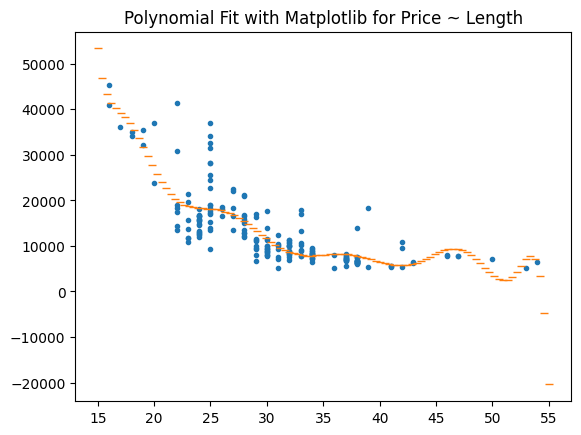

In [ ]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG') 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'



In the original data, there are 201 samples and 4 features.

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Question #5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [ ]:
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
pipe = Pipeline(input)
pipe

pipe.fit(Z,y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

4. Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

Model 1: Simple Linear Regression


Let's calculate the R^2:

In [123]:
x =df[['highway-mpg']]
y = df[['price']]
lm = LinearRegression()
lm.fit(x,y)

print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".
Let's calculate the MSE:

In [125]:
Yhat=lm.predict(x)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


Let's import the function mean_squared_error from the module metrics:

In [127]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [ ]:
rmse = np.sqrt(mse) # mse **(1/2)

rmse

np.float64(5624.503795415191)

Model 2: Multiple Linear Regression
Let's calculate the R^2:


In [131]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.
We produce a prediction:

In [134]:
Y_predict_multi = lm2.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', \
    mean_squared_error(df['price'],Y_predict_multi))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit
Let's calculate the R^2.

Let’s import the function r2_score from the module metrics as we are using a different function.

In [136]:
from sklearn.metrics import r2_score

In [138]:
r_squared = r2_score(y,p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit

MSE
We can also calculate the MSE:

In [139]:
mean_squared_error(df['price'], p(x))

20474146.426361218

5. Prediction and Decision Making
Prediction
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [140]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [144]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

new_input


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [146]:
lm.fit(x, y)
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [148]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\Tengkai\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

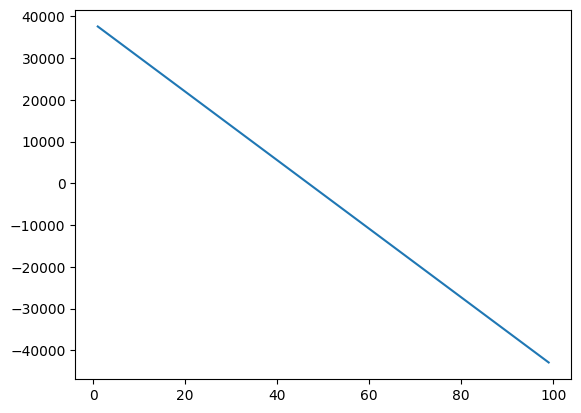

In [149]:
plt.plot(new_input, yhat)
plt.show()

Decision Making: Determining a Good Model Fit
Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

Simple Linear Model (SLR) vs. Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

Multiple Linear Regression (MLR) vs. Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
Conclusion
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.